In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
X_train = pd.read_csv('./data/omit_train_deps.csv', encoding='utf8')
X_test = pd.read_csv('./data/omit_test_deps.csv', encoding='utf8')
y_train = pd.read_csv('./data/omit_train_indeps.csv', encoding='utf8')
y_test = pd.read_csv('./data/omit_test_indeps.csv', encoding='utf8')

In [4]:
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(3302, 196)
(3302, 2)
(1693, 196)
(1693, 2)


In [9]:
X = X_train.append(X_test)
X = X.drop('Unnamed: 0', axis=1)
y = y_train.append(y_test)
y = y.drop('Unnamed: 0', axis=1)

In [10]:
print X.shape
print y.shape

(4995, 195)
(4995, 1)


In [12]:
X.describe()

,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate,host_has_profile_pic,host_identity_verified,...,amenities_smartlock,amenities_smokedetector,amenities_smokingallowed,amenities_suitableforevents,amenities_translationmissingenhostingamenity,amenities_tv,amenities_washer,amenities_wheelchairaccessible,amenities_wifi,amenities_wirelessinternet
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,3302.000000,3302.000000,...,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,0.181507,0.112833,0.051828,0.221455,0.142991,0.010052,0.966951,0.926144,0.999697,0.999697,...,0.010210,0.774975,0.043243,0.043844,0.264665,0.676076,0.527327,0.033634,0.181782,0.937337
std,0.151535,0.070081,0.094759,0.125919,0.107164,0.035980,0.110217,0.158263,0.017402,0.017402,...,0.100538,0.417641,0.203425,0.204768,0.441199,0.468018,0.499303,0.180302,0.385703,0.242379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.100000,0.000000,0.150000,0.090909,0.001175,1.000000,0.920000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.125000,0.100000,0.000000,0.233333,0.090909,0.002350,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.187500,0.100000,0.090909,0.233333,0.125000,0.008226,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
keep = pd.read_csv('./data/fin_comb_train_deps.csv', encoding='utf8')
keep = keep.append(pd.read_csv('./data/fin_comb_test_deps.csv', encoding='utf8'))
keep = keep.drop('Unnamed: 0', axis=1)
keeps = keep.sample(4995)
keeps.describe()

,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate,host_has_profile_pic,host_identity_verified,...,amenities_smartlock,amenities_smokedetector,amenities_smokingallowed,amenities_suitableforevents,amenities_translationmissingenhostingamenity,amenities_tv,amenities_washer,amenities_wheelchairaccessible,amenities_wifi,amenities_wirelessinternet
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,...,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,0.295896,0.266907,0.246189,0.191861,0.105277,0.026293,0.969904,0.963504,0.998799,0.998799,...,0.040641,0.861862,0.039840,0.063263,0.393393,0.752553,0.699900,0.048048,0.472472,0.982783
std,0.120626,0.167767,0.154612,0.117983,0.183395,0.094479,0.104997,0.116404,0.034641,0.034641,...,0.197476,0.345079,0.195602,0.243460,0.488552,0.431572,0.458347,0.213889,0.499292,0.130093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072917,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.200000,0.142857,0.125000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.250000,0.200000,0.142857,0.175000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.250000,0.400000,0.285714,0.250000,0.142857,0.010101,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.875000,1.000000,0.959596,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
num_cols = pd.read_csv('./data/numeric_columns.csv')
num_cols = num_cols.drop('Unnamed: 0', axis=1)
num_cols = num_cols.columns
print len(num_cols)

12


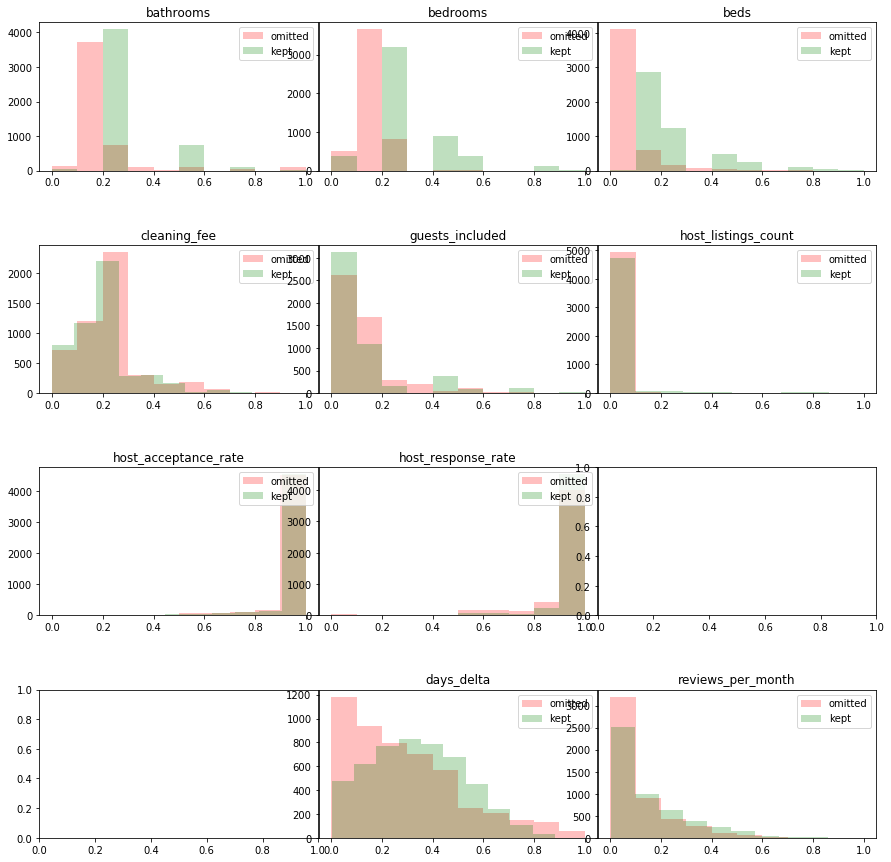

In [74]:


fig, axs = plt.subplots(4,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()


for ax, c in zip(axs, num_cols):
    try:
        ax.hist(X[c], color='r', alpha=0.25, label='omitted')
        ax.hist(keeps[c], color='g', alpha=0.25, label='kept')
        ax.set_title(c)
        ax.legend(loc='upper right')
    except Exception as e:
        pass
    else:
        pass
# axs[2].legend(loc='upper right')
plt.show()

In [69]:
from scipy import stats

In [73]:
print 'Wilcoxon rank sum test on omitted and kept rows.'
for c in X.columns:
    print '%s, p-val: %.4f' % (c, stats.wilcoxon(X[c], keeps[c])[1])

Wilcoxon rank sum test on omitted and kept rows.
bathrooms, p-val: 0.0000
bedrooms, p-val: 0.0000
beds, p-val: 0.0000
cleaning_fee, p-val: 0.0000
guests_included, p-val: 0.0000
host_listings_count, p-val: 0.0608
host_acceptance_rate, p-val: 0.0397
host_response_rate, p-val: 0.0000
host_has_profile_pic, p-val: 0.0000
host_identity_verified, p-val: 0.0000
days_delta, p-val: 0.0000
reviews_per_month, p-val: 0.0000
bed_type_couch, p-val: 0.0253
bed_type_futon, p-val: 0.7778
bed_type_pull_out_sofa, p-val: 0.1238
bed_type_real_bed, p-val: 0.2054
room_type_entire_home_apt, p-val: 0.0000
room_type_private_room, p-val: 0.0000
room_type_shared_room, p-val: 0.3303
neighbourhood_cleansed_bayview, p-val: 0.0000
neighbourhood_cleansed_bernal_heights, p-val: 0.0000
neighbourhood_cleansed_castro_upper_market, p-val: 0.0000
neighbourhood_cleansed_chinatown, p-val: 0.0000
neighbourhood_cleansed_crocker_amazon, p-val: 0.0104
neighbourhood_cleansed_diamond_heights, p-val: 0.7963
neighbourhood_cleansed_dow